# Name = Divyanshu_Singh

# Batch = DS2306

.

.

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

.

In [94]:
df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [96]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [97]:
# no null values

In [98]:
for col in df.columns:
    print(col," : ",len(df[col].unique()))

Age  :  73
Workclass  :  9
Fnlwgt  :  21647
Education  :  16
Education_num  :  16
Marital_status  :  7
Occupation  :  15
Relationship  :  6
Race  :  5
Sex  :  2
Capital_gain  :  119
Capital_loss  :  92
Hours_per_week  :  94
Native_country  :  42
Income  :  2


In [99]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [100]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [101]:
# ? since it's not defined we treat it as null values 

<Axes: ylabel='Workclass'>

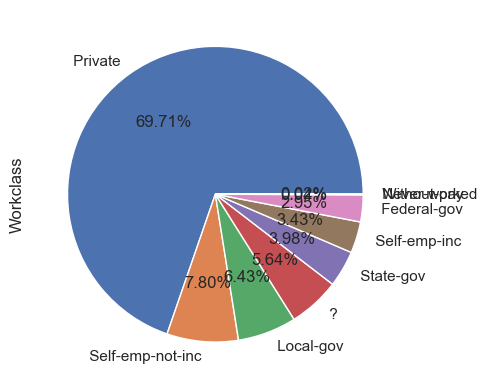

In [102]:
df['Workclass'].value_counts().plot.pie(autopct='%.2f%%')

In [103]:
df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<Axes: ylabel='Education'>

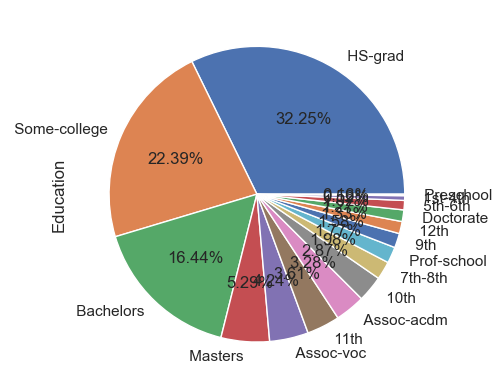

In [104]:
df['Education'].value_counts().plot.pie(autopct='%.2f%%')

In [105]:
df.Education_num.value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

<Axes: ylabel='Education_num'>

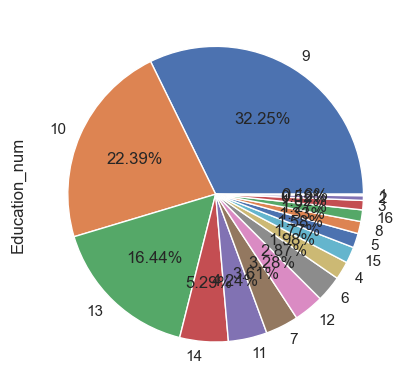

In [106]:
df['Education_num'].value_counts().plot.pie(autopct='%.2f%%')

In [107]:
# education and eduction_num are the same one is string and another one is int so we should drop the string column

In [108]:
df.Marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<Axes: ylabel='Marital_status'>

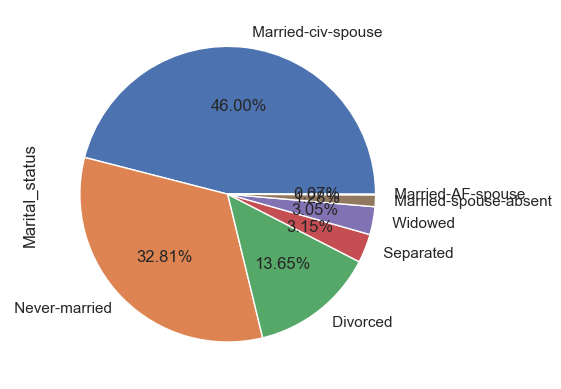

In [109]:
df['Marital_status'].value_counts().plot.pie(autopct='%.2f%%')

In [110]:
df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<Axes: ylabel='Occupation'>

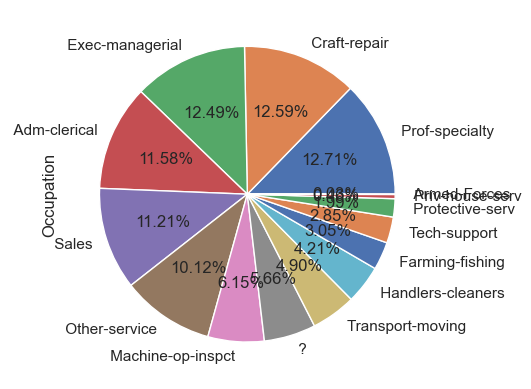

In [111]:
df['Occupation'].value_counts().plot.pie(autopct='%.2f%%')

In [112]:
df.Relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<Axes: ylabel='Relationship'>

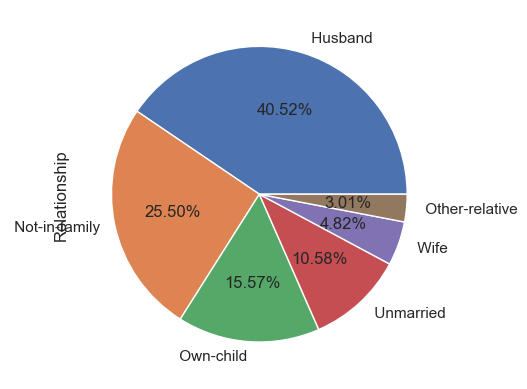

In [113]:
df['Relationship'].value_counts().plot.pie(autopct='%.2f%%')

In [114]:
df.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<Axes: ylabel='Race'>

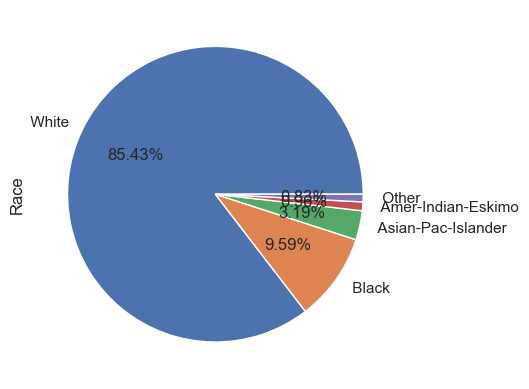

In [115]:
df['Race'].value_counts().plot.pie(autopct='%.2f%%')

In [116]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<Axes: ylabel='Income'>

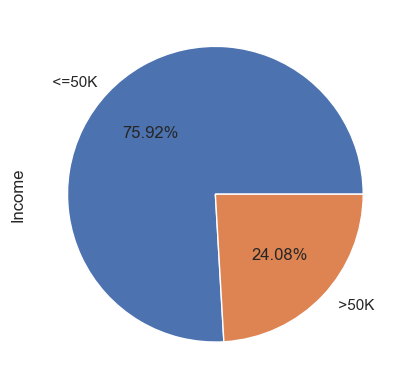

In [117]:
df['Income'].value_counts().plot.pie(autopct='%.2f%%')

In [118]:
# over_sampling or under_sampling is needed 

.

.

.

In [119]:
df.replace('?',np.nan,inplace=True)
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [120]:
df.replace(' ?',np.nan,inplace=True)
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [121]:
# There was space before '?'.

In [122]:
df=df.drop('Education',axis=1)

In [123]:
df.dropna()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [124]:
# droping the nan value will lead to loss of 2400 rows but we will only loose 7.4% of the data
# so we shold drop the nan values

In [125]:
df=df.dropna()

In [126]:
df.shape

(30161, 14)

In [127]:
df=df.drop_duplicates()

In [128]:
df.shape

(30138, 14)

In [129]:
# There were some duplicates present so 23 rows were deleted .

.

.

.

In [130]:
df.Income.value_counts()

 <=50K    22632
 >50K      7506
Name: Income, dtype: int64

In [131]:
df.Income = pd.factorize(df.Income)[0]

In [132]:
df.Income.value_counts()

0    22632
1     7506
Name: Income, dtype: int64

# 0 = <=50K
# 1 = >50K

<Axes: xlabel='Workclass', ylabel='count'>

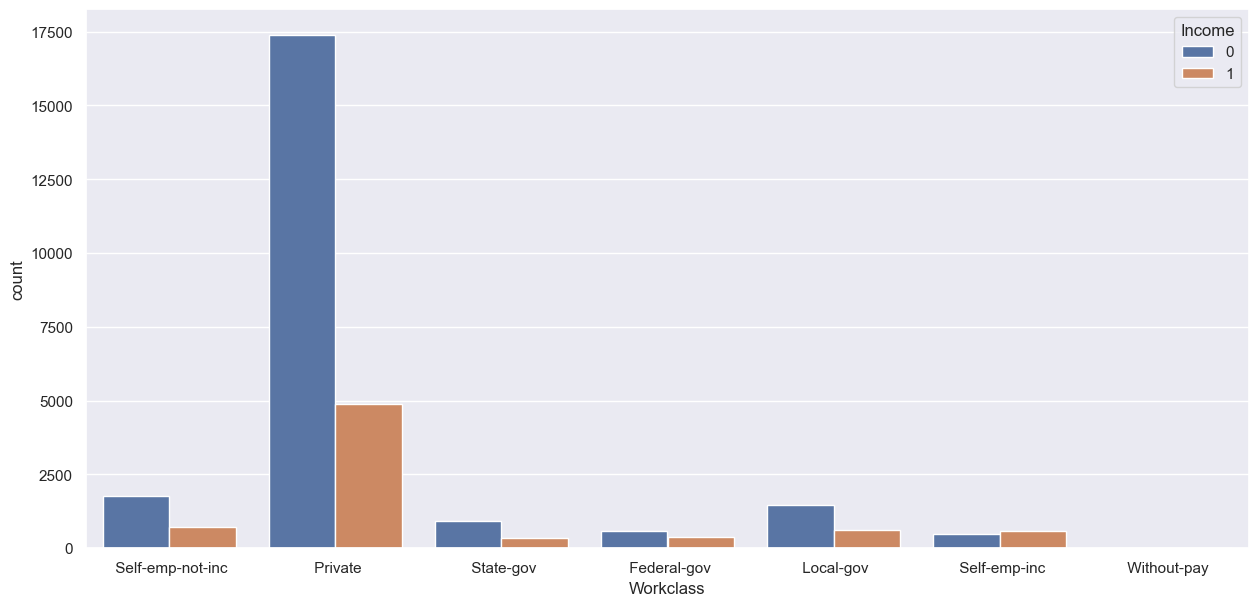

In [133]:
plt.figure(figsize=(15,7))
sns.countplot(x="Workclass",hue='Income',data=df)

<Axes: xlabel='Marital_status', ylabel='count'>

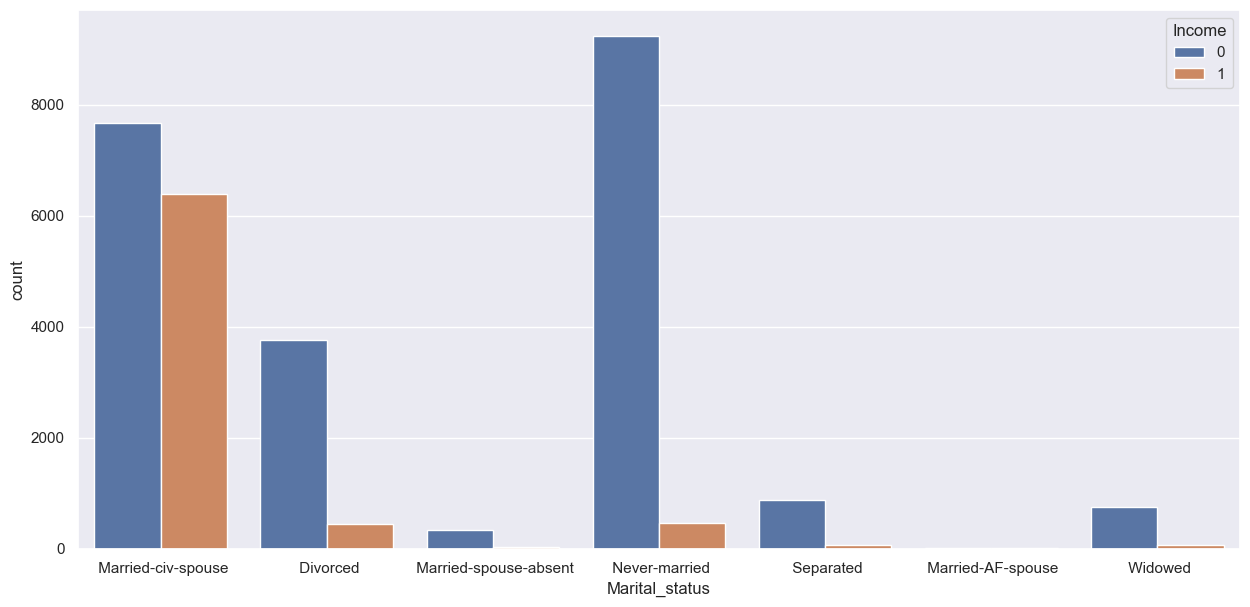

In [134]:
plt.figure(figsize=(15,7))
sns.countplot(x="Marital_status",hue='Income',data=df)

<Axes: xlabel='Relationship', ylabel='count'>

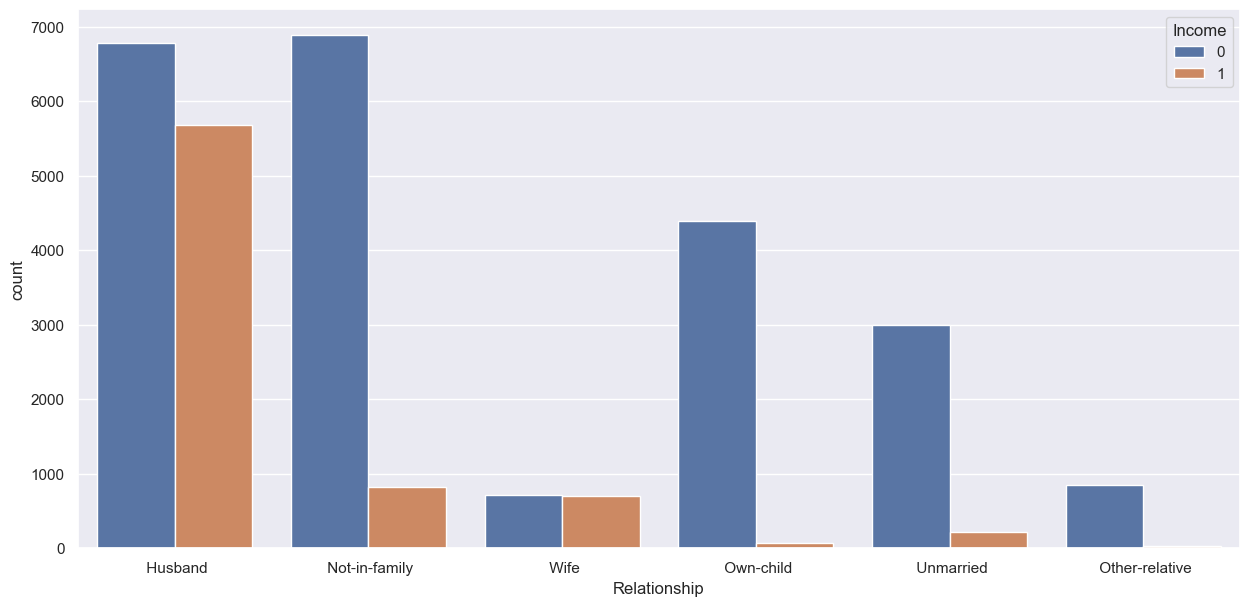

In [135]:
plt.figure(figsize=(15,7))
sns.countplot(x="Relationship",hue='Income',data=df)

<Axes: xlabel='Race', ylabel='count'>

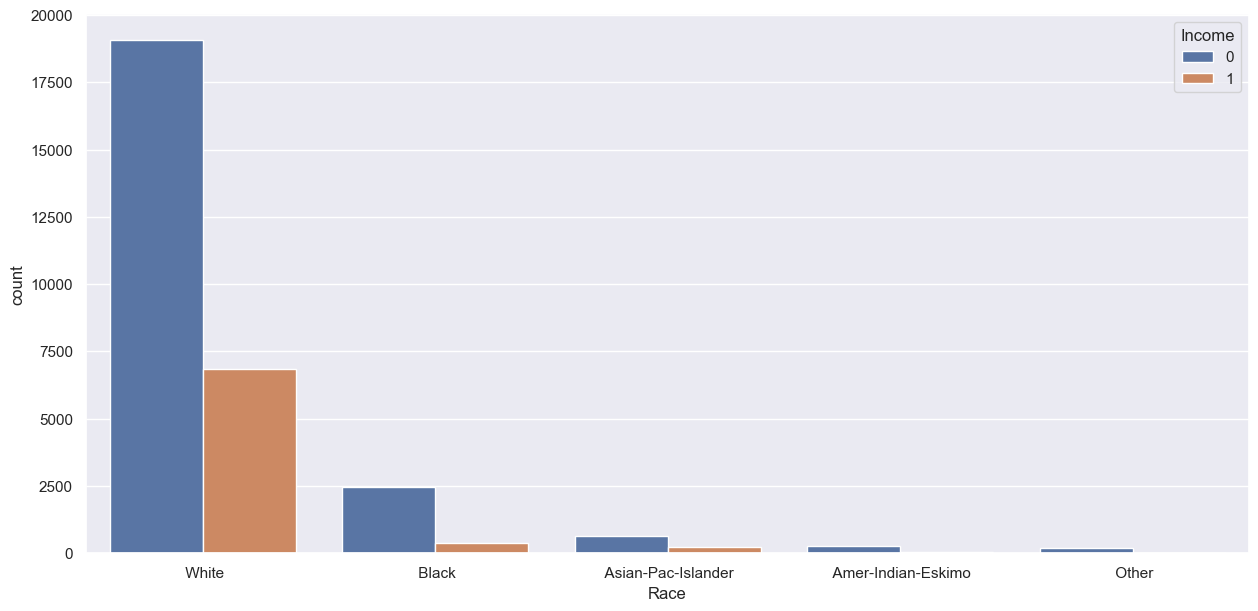

In [136]:
plt.figure(figsize=(15,7))
sns.countplot(x="Race",hue='Income',data=df)

<Axes: xlabel='Sex', ylabel='count'>

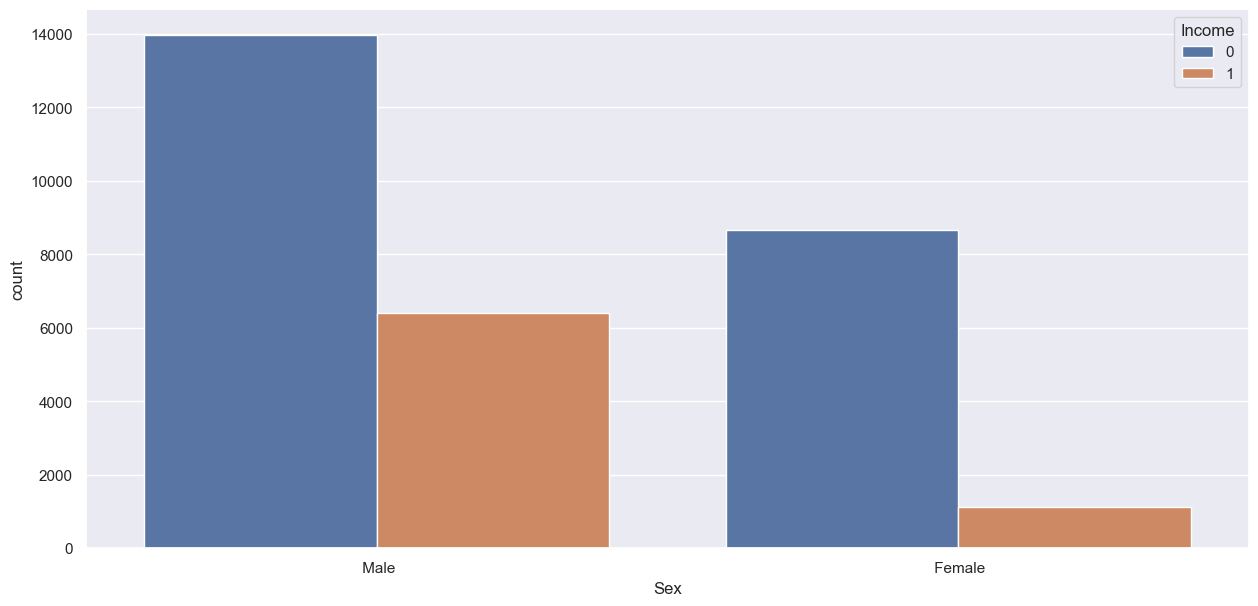

In [137]:
plt.figure(figsize=(15,7))
sns.countplot(x="Sex",hue='Income',data=df)

In [138]:
# White Man in Private sector earn the highest

In [139]:
df.Workclass = pd.factorize(df.Workclass)[0]
df.Marital_status = pd.factorize(df.Marital_status)[0]
df.Occupation = pd.factorize(df.Occupation)[0]
df.Relationship = pd.factorize(df.Relationship)[0]
df.Race = pd.factorize(df.Race)[0]
df.Sex = pd.factorize(df.Sex)[0]
df.Native_country = pd.factorize(df.Native_country)[0]

<Axes: >

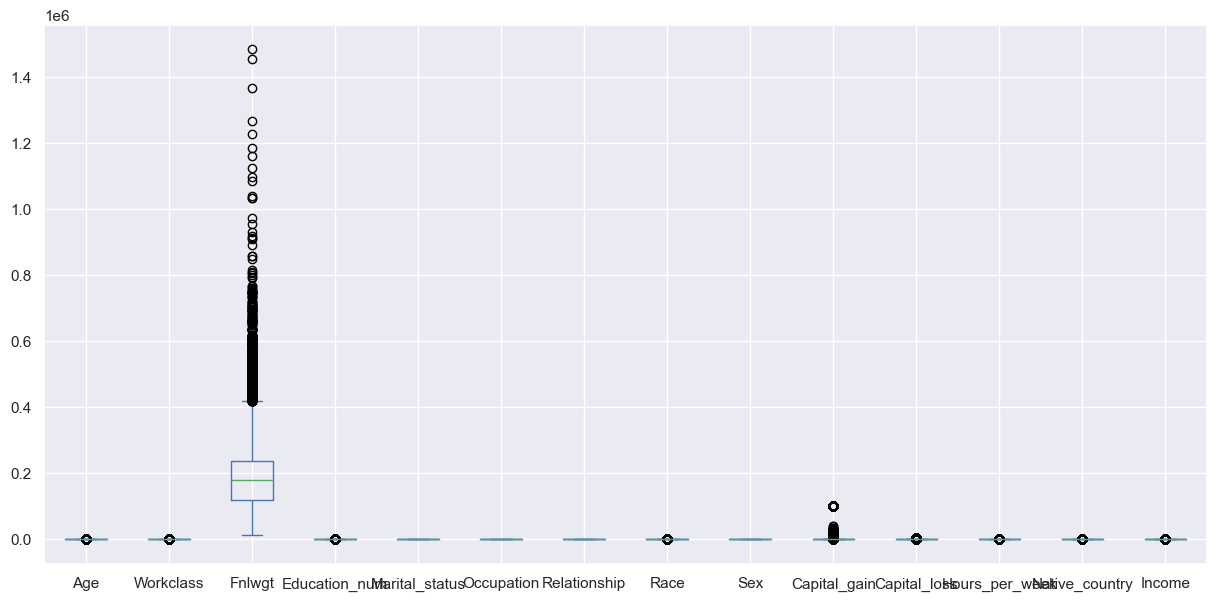

In [140]:
df.plot(kind='box',figsize=(15,7))

In [141]:
df.skew()

Age                0.528967
Workclass          1.921756
Fnlwgt             1.460047
Education_num     -0.302794
Marital_status     0.755020
Occupation         0.375720
Relationship       0.818961
Race               3.608817
Sex                0.750833
Capital_gain      11.897934
Capital_loss       4.524323
Hours_per_week     0.332373
Native_country     5.014655
Income             1.160593
dtype: float64

Age
0.5289402626758168


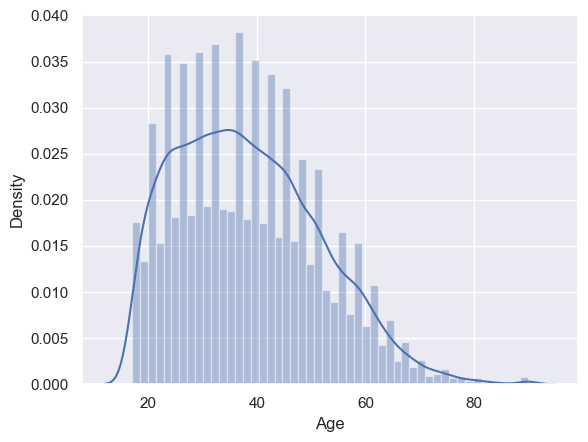

Workclass
1.9216607150865772


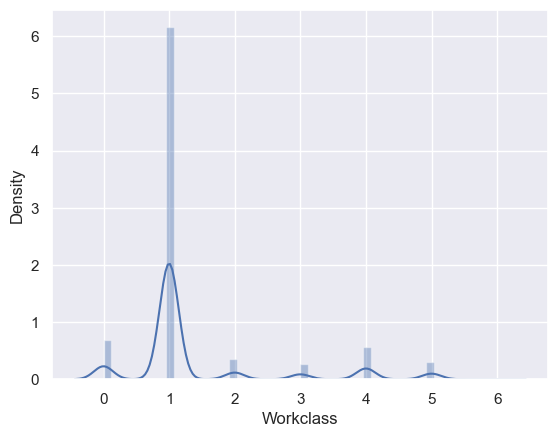

Fnlwgt
1.4599746497057335


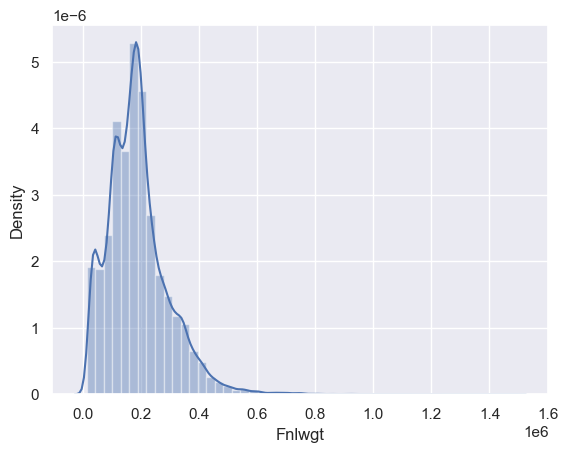

Education_num
-0.3027793849176931


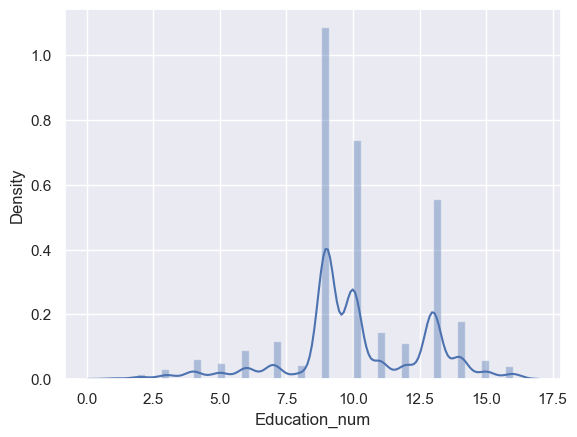

Marital_status
0.7549825769444548


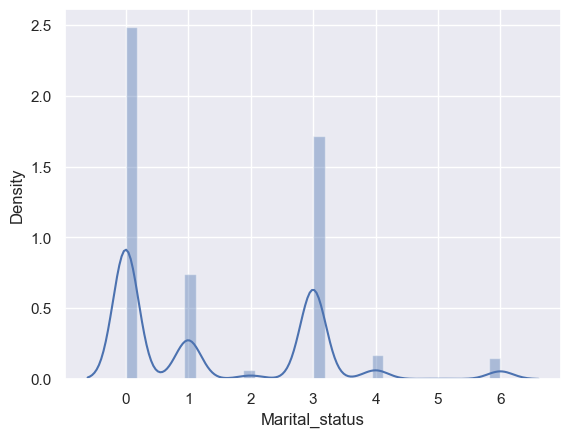

Occupation
0.3757017175628094


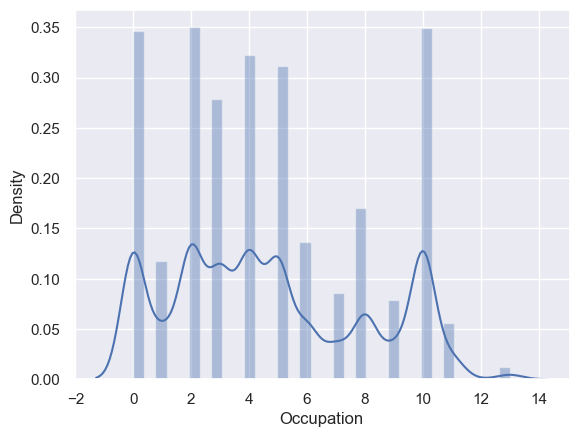

Relationship
0.8189199227261145


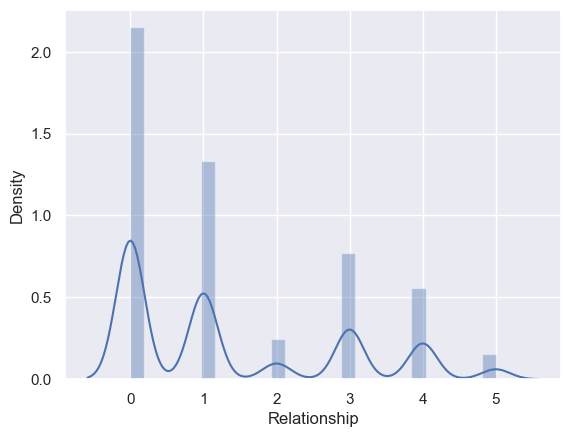

Race
3.608637406536973


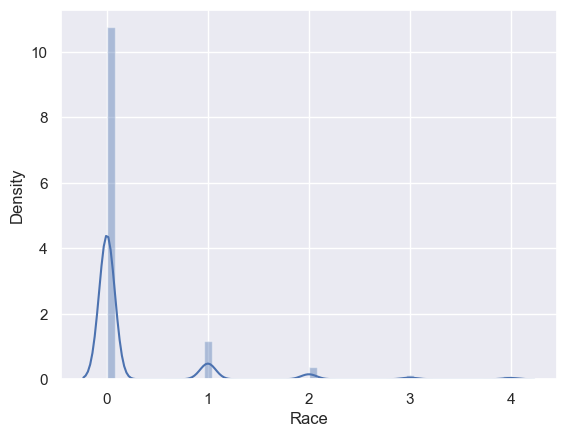

Sex
0.7507957671786445


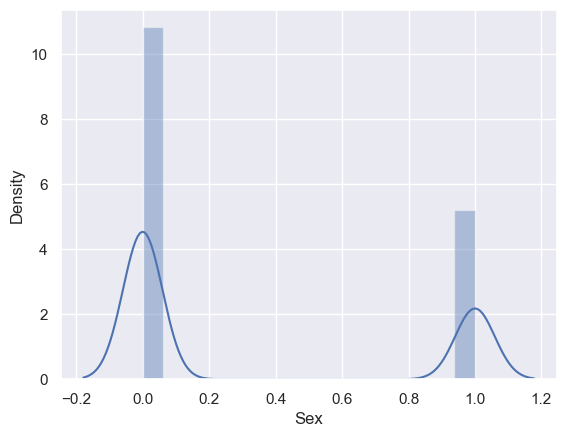

Capital_gain
11.89734169061327


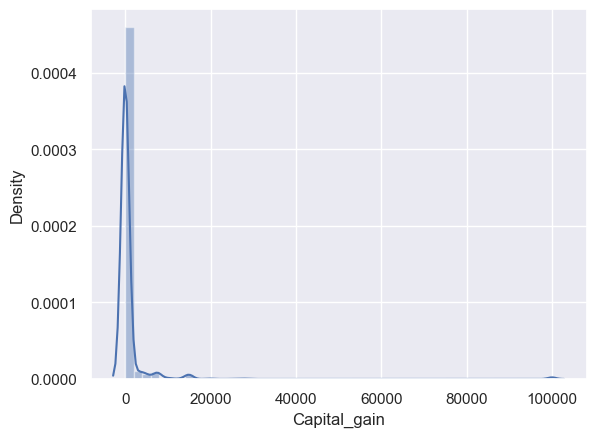

Capital_loss
4.524097970803484


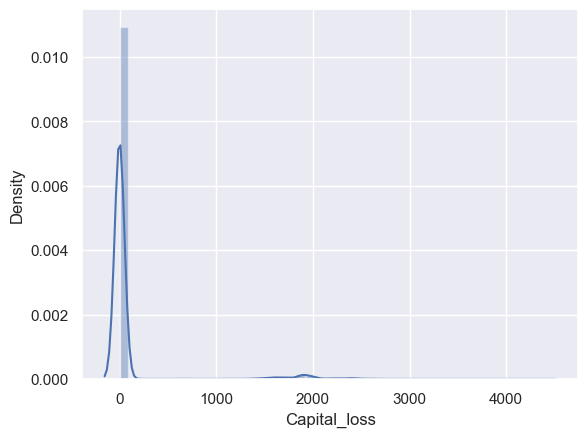

Hours_per_week
0.33235626374626964


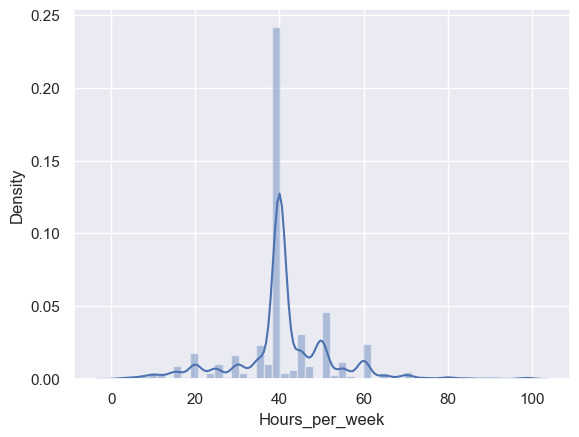

Native_country
5.014405844174085


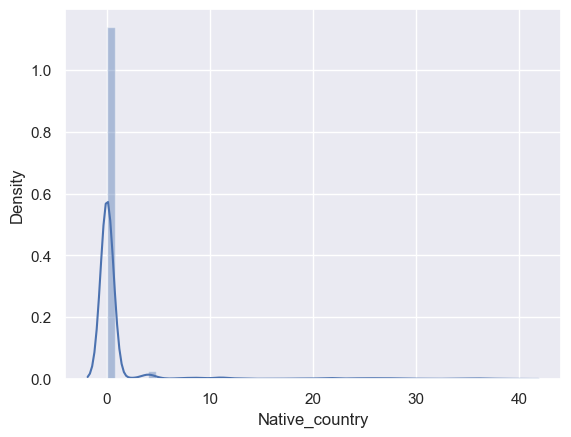

Income
1.1605352836187455


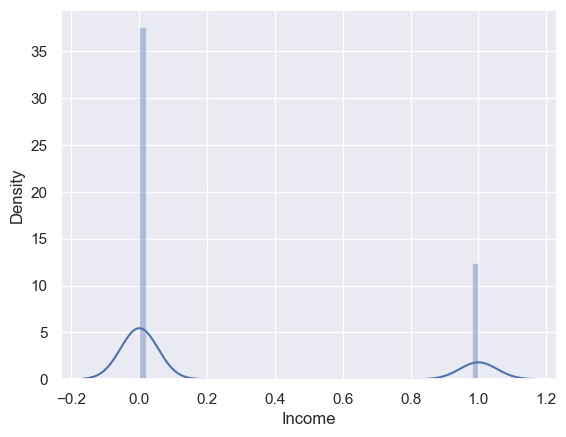

In [142]:
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30138.0,38.441702,13.131643,17.0,28.0,37.0,47.00,90.0
Workclass,30138.0,1.372719,1.144824,0.0,1.0,1.0,1.00,6.0
Fnlwgt,30138.0,189798.751477,105658.397715,13769.0,117629.5,178419.0,237606.25,1484705.0
Education_num,30138.0,10.122437,2.548727,1.0,9.0,10.0,13.00,16.0
Marital_status,30138.0,1.423618,1.601782,0.0,0.0,1.0,3.00,6.0
Occupation,30138.0,4.690524,3.370569,0.0,2.0,4.0,8.00,13.0
Relationship,30138.0,1.367045,1.532449,0.0,0.0,1.0,3.00,5.0
Race,30138.0,0.211892,0.612575,0.0,0.0,0.0,0.00,4.0
Sex,30138.0,0.324275,0.468111,0.0,0.0,0.0,1.00,1.0
Capital_gain,30138.0,1092.805329,7409.230902,0.0,0.0,0.0,0.00,99999.0


In [144]:
# we should delete Capital_gain and Capital_loss since min,25%,50%,75% are 0 but max value is way to high

In [145]:
df=df.drop(['Capital_gain','Capital_loss'],axis=1)

.

.

.

In [146]:
# Marital_status and Relationship are looking kind of same we should use df.corr() and see how much are they related

In [147]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Hours_per_week',
       'Native_country', 'Income'],
      dtype='object')

In [148]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,0,83311,13,0,0,0,0,0,13,0,0
1,38,1,215646,9,1,1,1,0,0,40,0,0
2,53,1,234721,7,0,1,0,1,0,40,0,0
3,28,1,338409,13,0,2,2,1,1,40,1,0
4,37,1,284582,14,0,0,2,0,1,40,0,0


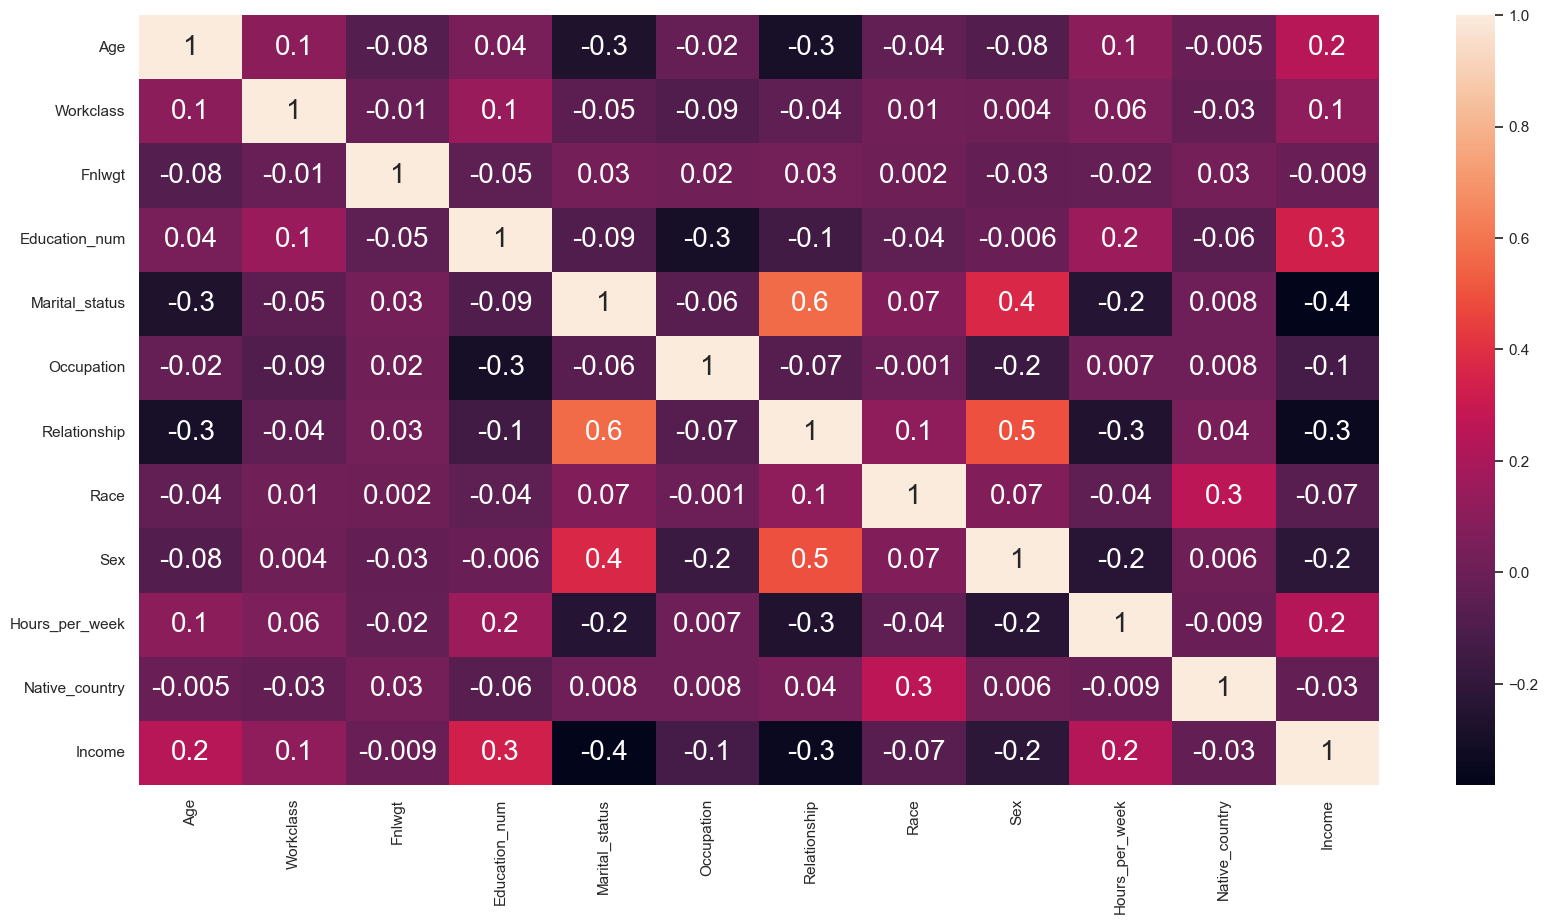

In [149]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':20})
sns.set(font_scale=3)

In [150]:
# Marital_status and Relationship are related 0.6 it's not that high so we will leave it be for now(if model accuracy is not good then we can delete relationship and see if there is any improvement)

In [151]:
df=df.drop(['Fnlwgt','Race','Native_country'],axis=1)
df

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Sex,Hours_per_week,Income
0,50,0,13,0,0,0,0,13,0
1,38,1,9,1,1,1,0,40,0
2,53,1,7,0,1,0,0,40,0
3,28,1,13,0,2,2,1,40,0
4,37,1,14,0,0,2,1,40,0
...,...,...,...,...,...,...,...,...,...
32555,27,1,12,0,9,2,1,38,0
32556,40,1,9,0,8,0,0,40,1
32557,58,1,9,6,4,4,1,40,0
32558,22,1,9,3,4,3,0,20,0


In [65]:
sns.set(font_scale=1)

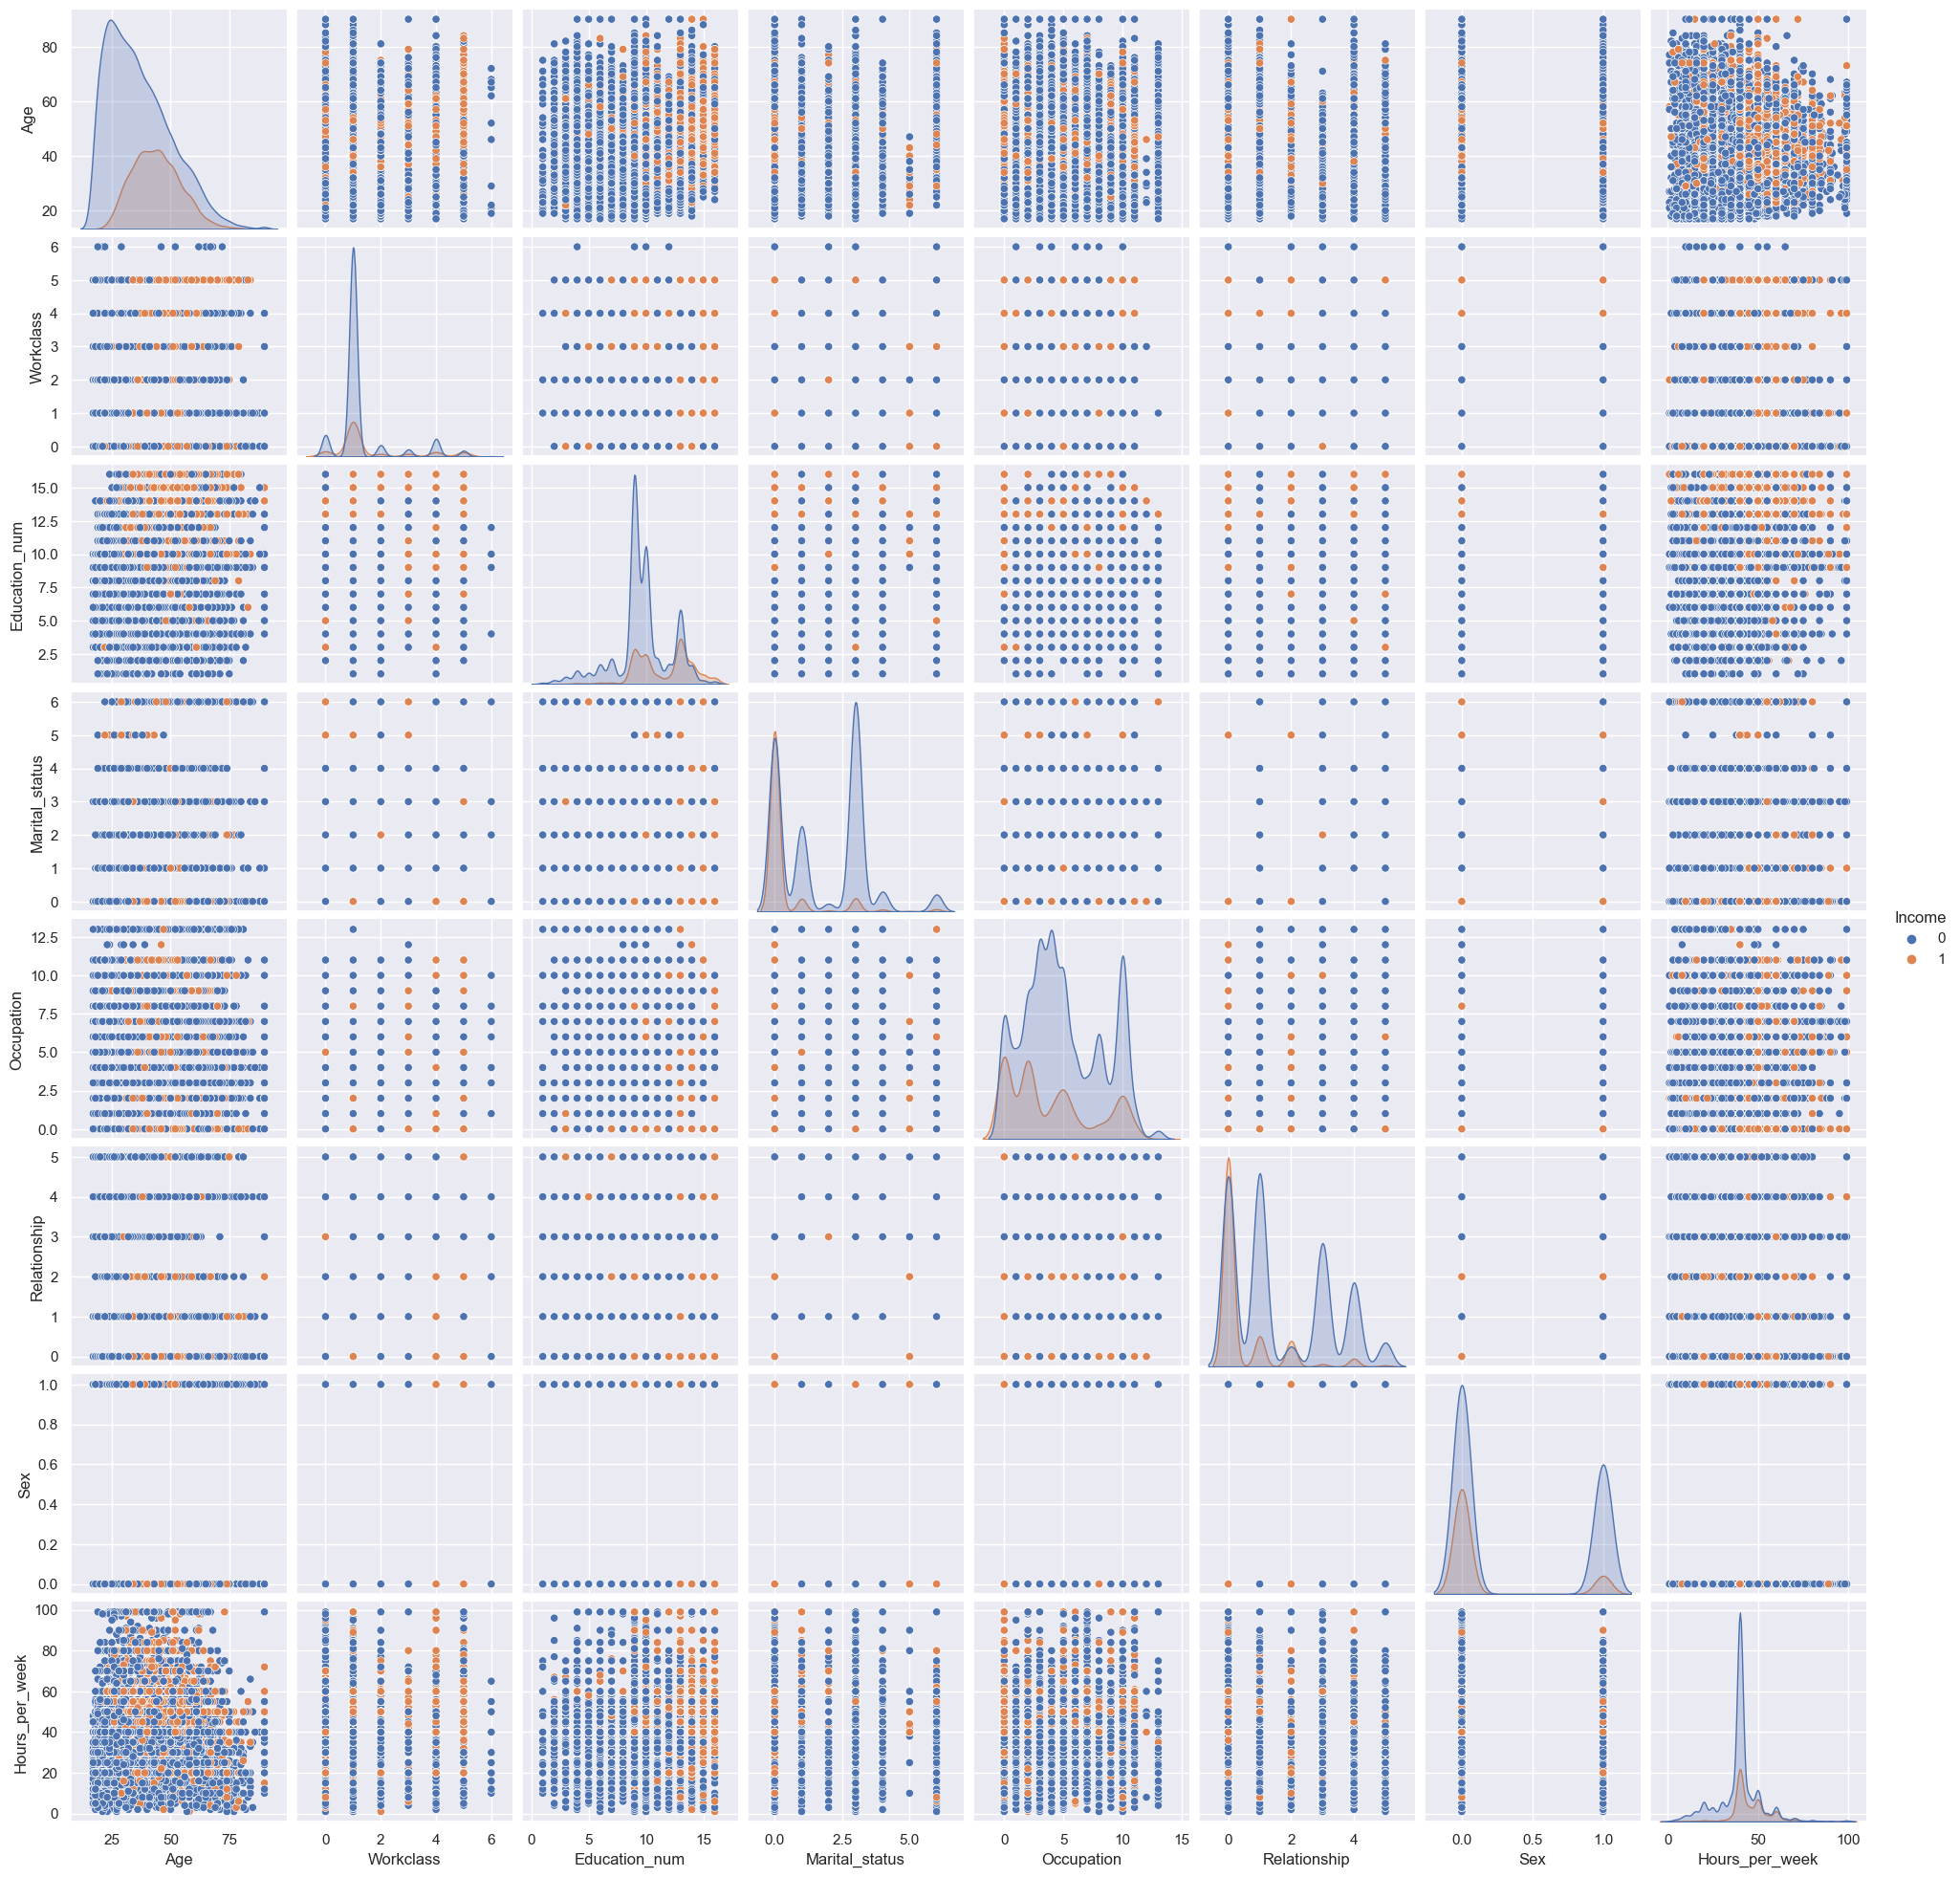

In [66]:
sns.pairplot(data=df,hue='Income')
sns.set(font_scale=1)

.

.

In [67]:
x=df.drop('Income',axis=1)
y=df.Income

In [68]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [69]:
y1.value_counts()

0    22632
1    22632
Name: Income, dtype: int64

In [70]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x1,y1, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

.

In [72]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print('Training  : ',knn.score(x_train_sca,y_train))
print('Testint : ',knn.score(x_test_sca,y_test))

print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

Training  :  0.8725539704582754
Testint :  0.8309278350515464
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      6815
           1       0.80      0.87      0.84      6765

    accuracy                           0.83     13580
   macro avg       0.83      0.83      0.83     13580
weighted avg       0.83      0.83      0.83     13580

[0.79462508 0.79230259 0.80258792 0.80172557 0.80238925]
0.7987260821107054
difference 0.032201752940841044


In [73]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print('Training  : ',gs.score(x_train_sca,y_train))
print('Testint : ',gs.score(x_test_sca,y_test))

print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

Training  :  0.752335563691453
Testint :  0.7574374079528718
              precision    recall  f1-score   support

           0       0.80      0.68      0.74      6815
           1       0.72      0.83      0.77      6765

    accuracy                           0.76     13580
   macro avg       0.76      0.76      0.76     13580
weighted avg       0.76      0.76      0.76     13580

[0.75713338 0.76575979 0.76161248 0.76190476 0.76837564]
0.7629572090379841
difference -0.005519801085112297


In [74]:
rfc= RandomForestClassifier(n_estimators= 500, min_samples_split= 8, max_features=5, max_depth= 20, criterion='gini')
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testint : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  0.9180659007701047
Testint :  0.8601620029455082
              precision    recall  f1-score   support

           0       0.90      0.82      0.85      6815
           1       0.83      0.90      0.87      6765

    accuracy                           0.86     13580
   macro avg       0.86      0.86      0.86     13580
weighted avg       0.86      0.86      0.86     13580

[0.83519108 0.82046178 0.83558917 0.82285032 0.83001592 0.83558917
 0.81959379 0.83193947 0.84269215 0.82915173 0.82596575 0.82477101]
0.8294842792561985
difference 0.030677723689309655
[[5565 1250]
 [ 649 6116]]


In [75]:
rfc_param = {'max_depth':[5,10,15,20],
            'max_features':[5,7,8,'auto'],
            'criterion':['gini','entropy'],
            'min_samples_split':[4,8,16,24],
            'n_estimators':[100,200,300,400,500]}
clf = RandomizedSearchCV(rfc, rfc_param,cv=5)
clf.fit(x_train_sca,y_train)

print(clf.best_score_)
print(clf.best_params_)

0.8448113671829546
{'n_estimators': 300, 'min_samples_split': 4, 'max_features': 7, 'max_depth': 15, 'criterion': 'gini'}


In [76]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print('Training  : ',abc.score(x_train_sca,y_train))
print('Testint : ',abc.score(x_test_sca,y_test))

print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

Training  :  0.8125552329251358
Testint :  0.8199558173784978
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      6815
           1       0.79      0.87      0.83      6765

    accuracy                           0.82     13580
   macro avg       0.82      0.82      0.82     13580
weighted avg       0.82      0.82      0.82     13580

[0.82763769 0.82166556 0.83278036 0.83822797 0.83026381]
0.8301150793559045
difference -0.010159261977406686


In [77]:
gbcbest = GradientBoostingClassifier()
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testint : ',gbcbest.score(x_test_sca,y_test))

print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

Training  :  0.8256848882716828
Testint :  0.8268041237113402
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      6815
           1       0.79      0.88      0.83      6765

    accuracy                           0.83     13580
   macro avg       0.83      0.83      0.83     13580
weighted avg       0.83      0.83      0.83     13580

[0.83377571 0.83228268 0.83676178 0.84237597 0.83441181]
0.8359215921628496
difference -0.009117468451509403


In [78]:
gbcbest_param = {'max_depth':[5,10,15,20],
            'max_features':[5,7,8,'auto'],
            'criterion':['friedman_mse', 'squared_error'],
            'min_samples_split':[4,8,16,24]
            }
clf = RandomizedSearchCV(gbcbest, gbcbest_param,cv=5)
clf.fit(x_train_sca,y_train)

print(clf.best_score_)
print(clf.best_params_)


KeyboardInterrupt



In [79]:
gbcbest = GradientBoostingClassifier(min_samples_split= 16, max_features=5, max_depth= 10, criterion= 'squared_error')
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testint : ',gbcbest.score(x_test_sca,y_test))

print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

Training  :  0.9085658376467618
Testint :  0.8572164948453608
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      6815
           1       0.83      0.90      0.86      6765

    accuracy                           0.86     13580
   macro avg       0.86      0.86      0.86     13580
weighted avg       0.86      0.86      0.86     13580

[0.82846715 0.82597877 0.82448573 0.83855981 0.83457773]
0.8304138399982648
difference 0.026802654847095986


In [80]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print('Training  : ',bc.score(x_train_sca,y_train))
print('Testint : ',bc.score(x_test_sca,y_test))

print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

Training  :  0.9525943693978033
Testint :  0.8488954344624448
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6815
           1       0.83      0.87      0.85      6765

    accuracy                           0.85     13580
   macro avg       0.85      0.85      0.85     13580
weighted avg       0.85      0.85      0.85     13580

[0.80374917 0.80673524 0.80142668 0.80404845 0.79790941]
0.8027737875864736
difference 0.0461216468759712


In [81]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testint : ',lr.score(x_test_sca,y_test))

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

Training  :  0.7898623911122333
Testint :  0.790500736377025
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      6815
           1       0.77      0.83      0.80      6765

    accuracy                           0.79     13580
   macro avg       0.79      0.79      0.79     13580
weighted avg       0.79      0.79      0.79     13580

[0.81254147 0.81055076 0.81735236 0.82130413 0.81217853]
0.8147854506523343
difference -0.024284714275309316


In [82]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testint : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

Training  :  0.9597588688296932
Testint :  0.8304860088365243
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      6815
           1       0.82      0.85      0.83      6765

    accuracy                           0.83     13580
   macro avg       0.83      0.83      0.83     13580
weighted avg       0.83      0.83      0.83     13580

[0.77289317 0.77753816 0.77372263 0.78314253 0.76837564]
0.7751344232968893
difference 0.05535158553963504


.

.

.

In [152]:
df

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Sex,Hours_per_week,Income
0,50,0,13,0,0,0,0,13,0
1,38,1,9,1,1,1,0,40,0
2,53,1,7,0,1,0,0,40,0
3,28,1,13,0,2,2,1,40,0
4,37,1,14,0,0,2,1,40,0
...,...,...,...,...,...,...,...,...,...
32555,27,1,12,0,9,2,1,38,0
32556,40,1,9,0,8,0,0,40,1
32557,58,1,9,6,4,4,1,40,0
32558,22,1,9,3,4,3,0,20,0


In [155]:
ohe=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')

In [156]:
ohetransform = ohe.fit_transform(df[['Workclass','Marital_status','Occupation','Relationship','Sex']])

In [157]:
ohetransform

,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Marital_status_1,Marital_status_2,Marital_status_3,Marital_status_4,...,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Relationship_1,Relationship_2,Relationship_3,Relationship_4,Relationship_5,Sex_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32556,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
32558,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [158]:
df = pd.concat([df,ohetransform],axis=1)

In [159]:
df=df.drop(['Workclass','Marital_status','Occupation','Relationship','Sex'],axis=1)

In [160]:
df.shape

(30138, 35)

In [161]:
x2=df.drop('Income',axis=1)
y2=df.Income

In [162]:
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [163]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x3,y3 = sm.fit_resample(x2,y2)

In [164]:
y3.value_counts()

0    22632
1    22632
Name: Income, dtype: int64

In [165]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [166]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x1,y1, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

.

.

In [167]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print(accuracy_score(y_test,knny_pred))
print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

0.8309278350515464
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      6815
           1       0.80      0.87      0.84      6765

    accuracy                           0.83     13580
   macro avg       0.83      0.83      0.83     13580
weighted avg       0.83      0.83      0.83     13580

[0.81005309 0.81386861 0.81735236 0.81665837 0.80803053]
0.8131925908725929
difference 0.017735244178953558


In [168]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print(accuracy_score(y_test,gsy_pred))
print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

0.7574374079528718
              precision    recall  f1-score   support

           0       0.80      0.68      0.74      6815
           1       0.72      0.83      0.77      6765

    accuracy                           0.76     13580
   macro avg       0.76      0.76      0.76     13580
weighted avg       0.76      0.76      0.76     13580

[0.75713338 0.76575979 0.76161248 0.76190476 0.76837564]
0.7629572090379841
difference -0.005519801085112297


In [169]:
rfc= RandomForestClassifier()
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print(accuracy_score(y_test,rfcy_pred))
print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=11)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

0.8590574374079528
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      6815
           1       0.84      0.89      0.86      6765

    accuracy                           0.86     13580
   macro avg       0.86      0.86      0.86     13580
weighted avg       0.86      0.86      0.86     13580

[0.81459854 0.80583942 0.8149635  0.80255474 0.81934307 0.81715328
 0.81167883 0.82226277 0.82153285 0.81087988 0.80832421]
0.8135573723984435
difference 0.045500065009509316
[[5658 1157]
 [ 757 6008]]


In [170]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print(accuracy_score(y_test,abcy_pred))
print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

0.8199558173784978
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      6815
           1       0.79      0.87      0.83      6765

    accuracy                           0.82     13580
   macro avg       0.82      0.82      0.82     13580
weighted avg       0.82      0.82      0.82     13580

[0.82763769 0.82166556 0.83278036 0.83822797 0.83026381]
0.8301150793559045
difference -0.010159261977406686


In [171]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_sca,y_train)
gbcy_pred = gbc.predict(x_test_sca)

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbc,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

0.8267304860088365
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      6815
           1       0.79      0.88      0.83      6765

    accuracy                           0.83     13580
   macro avg       0.83      0.83      0.83     13580
weighted avg       0.83      0.83      0.83     13580

[0.83377571 0.83228268 0.83676178 0.84237597 0.83441181]
0.8359215921628496
difference -0.009191106154013085


In [172]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print(accuracy_score(y_test,bcy_pred))
print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

0.846980854197349
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      6815
           1       0.83      0.87      0.85      6765

    accuracy                           0.85     13580
   macro avg       0.85      0.85      0.85     13580
weighted avg       0.85      0.85      0.85     13580

[0.80491042 0.80209025 0.80590577 0.81251037 0.80238925]
0.8055612110026006
difference 0.041419643194748446


In [173]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      6815
           1       0.77      0.83      0.80      6765

    accuracy                           0.79     13580
   macro avg       0.79      0.79      0.79     13580
weighted avg       0.79      0.79      0.79     13580

[0.81121433 0.81088255 0.81702057 0.82329517 0.81732205]
0.815946934877986
difference -0.02544619850096097


In [174]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print(accuracy_score(y_test,dtcy_pred))
print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

0.8286450662739323
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      6815
           1       0.81      0.85      0.83      6765

    accuracy                           0.83     13580
   macro avg       0.83      0.83      0.83     13580
weighted avg       0.83      0.83      0.83     13580

[0.77023889 0.7786994  0.77538155 0.78695869 0.77152812]
0.7765613300202177
difference 0.05208373625371465


In [175]:
classifier = [('RandomForestClassifier',rfc),('GradientBoostingClassifier',gbc),('BaggingClassifier',bc),('LogisticRegression',lr),('AdaBoostClassifier',abc),('KNeighborsClassifier',knn)]
vc= VotingClassifier(estimators=classifier)
vc.fit(x_train_sca,y_train)
vcy_pred = vc.predict(x_test_sca)

print(accuracy_score(y_test,vcy_pred))
print(classification_report(y_test,vcy_pred))

recheck = cross_val_score(vc,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,vcy_pred) - recheck.mean())

0.8425625920471281
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6815
           1       0.83      0.87      0.85      6765

    accuracy                           0.84     13580
   macro avg       0.84      0.84      0.84     13580
weighted avg       0.84      0.84      0.84     13580

[0.82548109 0.82581287 0.83443928 0.83839389 0.83142525]
0.8311104784056791
difference 0.011452113641449047


.

.

In [176]:
# here i used both onehot encoding method as well as factorization and there was no difference in accuracy

.

# gbcbest is the best performing algorithm with the accuracy of 83% and no over/under fitting

In [177]:
# randomforest was also great performing but we choose gbc because it's differce is the least.

In [178]:
import joblib
joblib.dump(gbcbest,'census_income.obj')

['census_income.obj']